# Salary prediction project

problem - Given datset which captures gross salary from july 2013 through june 2014 and includes those employees who were employed on june 2014. predict salary of employees.

# Outline
1. import dataset
2. Data cleaning and preperation.
3. Exploratory data analysis.
4. feature engineering.
5. train_test_split.
6. model building.
7. model evaluation

Linear regression, as it's core , is a way of calculating the relationship between two variables. - it creates linear mathematical relationship between two variables. - one is dependent and one is independent. It enables 

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np

# Libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sb

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Feature scaling
from sklearn.preprocessing import StandardScaler

# Import for train test and split
from sklearn.model_selection import train_test_split
 
 # Model building
from sklearn.linear_model import LinearRegression

In [ ]:
# import dataset
df=pd.read_csv("/content/drive/MyDrive/Data Sets/predict employee salary/train_salary.csv")
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [ ]:
# Data cleaning and preparation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


 1. There are 18981 rows.
 2. There are 7 column in dataset.
 3. All the columns are of object datatype 

In [ ]:
# create a copy of datset 
df_cpy = df.copy()

In [ ]:
df_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
df_cpy.columns=df_cpy.columns.str.strip()  # removing spaces before and after

In [ ]:
df_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
# check null values in dataset
df_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
df_cpy=df_cpy.dropna(subset=['HireDate'])

In [ ]:
df_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
# grosspay depend on  annual salary 
df_cpy= df_cpy.drop('GrossPay',axis=1)
df_cpy.isnull().sum() 

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [ ]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18911 non-null  object
 1   JobTitle      18911 non-null  object
 2   AgencyID      18911 non-null  object
 3   Agency        18911 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18911 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


In [ ]:
# value_counts for AgencyID
df_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

In [ ]:
# value_counts for Agency
df_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [ ]:
# value_counts() for job title
df_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

In [ ]:
# values of HireDate
df_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: HireDate, Length: 4737, dtype: int64

In [ ]:
df_cpy['HireDay']=df_cpy['HireDate'].apply(lambda x: (int)(str(x[3:5])))
df_cpy['HireMonth']=df_cpy['HireDate'].apply(lambda x: (int)(str(x[0:2])))
df_cpy['HireYear']=df_cpy['HireDate'].apply(lambda x: (int)(str(x[6:])))


In [ ]:
df_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,24,7,2013


In [ ]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18911 non-null  object
 1   JobTitle      18911 non-null  object
 2   AgencyID      18911 non-null  object
 3   Agency        18911 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18911 non-null  object
 6   HireDay       18911 non-null  int64 
 7   HireMonth     18911 non-null  int64 
 8   HireYear      18911 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.4+ MB


In [ ]:
df_cpy['AnnualSalary']=df_cpy['AnnualSalary'].apply(lambda x: (float)(str(x[1:])))

In [ ]:
df_cpy.head(20)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013
5,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology,05/01/2013,52000.0,1,5,2013
6,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department,03/30/2011,62175.0,30,3,2011
7,"Abdi,Ezekiel W",POLICE SERGEANT,A99127,Police Department,06/14/2007,70918.0,14,6,2007
8,"Abdul Adl,Attrice A",RADIO DISPATCHER SHERIFF,A38410,Sheriff's Office,09/02/1999,42438.0,2,9,1999
9,"Abdul Aziz,Hajr E",AIDE BLUE CHIP,W02097,Youth Summer,06/18/2014,11310.0,18,6,2014


In [ ]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireDay       18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [ ]:
# job title, agency and agency id- strip leading and trailing spaces- 
#replace double spaces with a single space- convert all values of these three columns into upper case

df_cpy.JobTitle=df_cpy.JobTitle.str.strip()
df_cpy.Agency=df_cpy.Agency.str.strip()
df_cpy.AgencyID=df_cpy.AgencyID.str.strip()

In [ ]:
# converting all values to uppercase and replacing double spaces with single space
df_cpy.Agency=df_cpy.Agency.apply(lambda x: x.upper().replace('  ',' '))
df_cpy.AgencyID=df_cpy.AgencyID.apply(lambda x: x.upper().replace('  ',' '))
df_cpy.JobTitle=df_cpy.JobTitle.apply(lambda x: x.upper().replace('  ',' '))


In [ ]:
df_cpy.head(10)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013
5,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R INFO TECHNOLOGY,05/01/2013,52000.0,1,5,2013
6,"Abdal-Rahim,Naim A",EMT FIREFIGHTER SUPPRESSION,A64120,FIRE DEPARTMENT,03/30/2011,62175.0,30,3,2011
7,"Abdi,Ezekiel W",POLICE SERGEANT,A99127,POLICE DEPARTMENT,06/14/2007,70918.0,14,6,2007
8,"Abdul Adl,Attrice A",RADIO DISPATCHER SHERIFF,A38410,SHERIFF'S OFFICE,09/02/1999,42438.0,2,9,1999
9,"Abdul Aziz,Hajr E",AIDE BLUE CHIP,W02097,YOUTH SUMMER,06/18/2014,11310.0,18,6,2014


# Last thing is outliers treatment

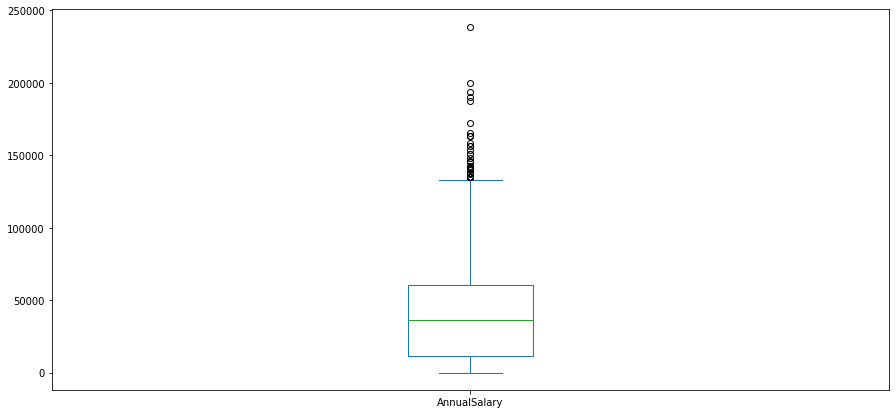

In [ ]:

# plot boxplot for annual 
plt.figure(figsize=(15,7))
df_cpy.AnnualSalary.plot.box()


In [ ]:
# descriptive statistics
df_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [ ]:
df_cpy=df_cpy[df_cpy.AnnualSalary<150000]

In [ ]:
df_cpy.shape

(18895, 9)

{'boxes': [<matplotlib.lines.Line2D at 0x7f6ea1bf43d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6ea1bf9450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ea1c00490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ea1bf9f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6ea1bf4990>,
  <matplotlib.lines.Line2D at 0x7f6ea1bf4ed0>]}

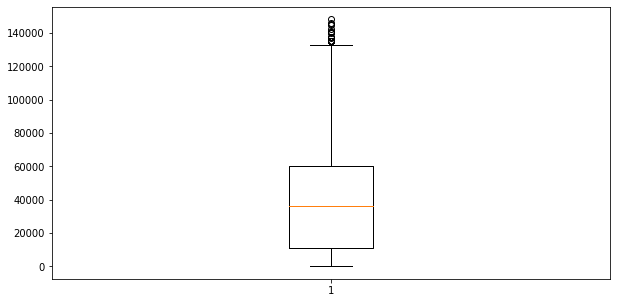

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(df_cpy.AnnualSalary)

# EDA

Text(0.5, 1.0, 'Annual salary distribution')

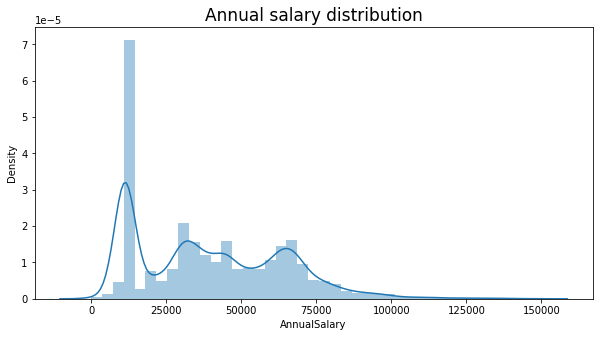

In [ ]:
# Check distribution of data
plt.figure(figsize=(10,5))
sb.distplot(df_cpy.AnnualSalary)
plt.title("Annual salary distribution",fontsize=17)

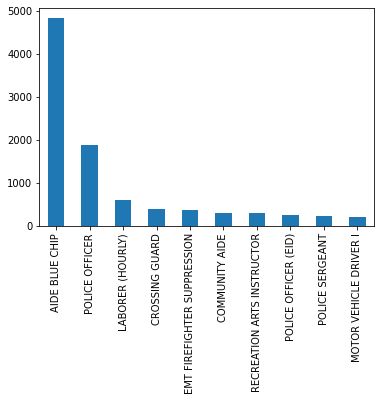

In [ ]:
# Find top 10 jobs
df_cpy['JobTitle'].value_counts()[:10].plot.bar()

Text(0.5, 1.0, 'Top 10 jobs for which is highest')

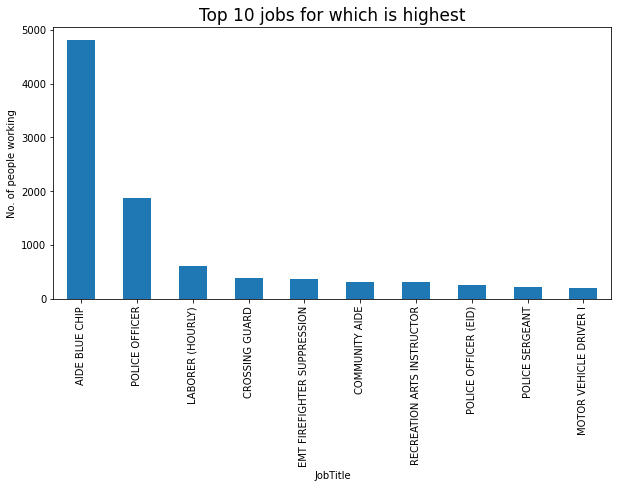

In [ ]:
# Another way of doing 
plt.figure(figsize=(10,5))
df_cpy.groupby('JobTitle')['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("No. of people working")
plt.title("Top 10 jobs for which is highest",fontsize=17)

Text(0.5, 1.0, 'Top 10 highest paying jobs')

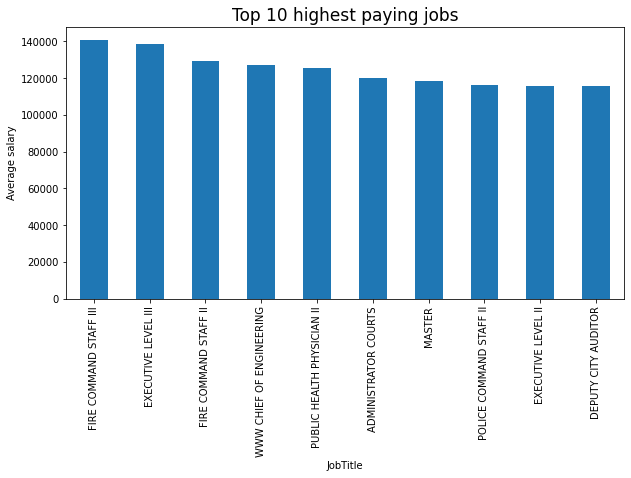

In [ ]:
# Top 10 paying jobs
plt.figure(figsize=(10,5))
df_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("Average salary")
plt.title("Top 10 highest paying jobs",fontsize=17)

In [ ]:
# find the total avearge salary
mean_sal=df_cpy.AnnualSalary.mean()

#Find the number of jobs paying more than total average salary

good_pay_jobs=df_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_pay_jobs[good_pay_jobs['AnnualSalary']>mean_sal]['JobTitle'].count()

798

In [ ]:
# Jobs paying more than total average salary
good_pay_jobs[good_pay_jobs['AnnualSalary']>mean_sal]['JobTitle']

0                 911 LEAD OPERATOR
1                      911 OPERATOR
2           911 OPERATOR SUPERVISOR
3                 ACCOUNT EXECUTIVE
4                      ACCOUNTANT I
                   ...             
1050           ZONING ADMINISTRATOR
1051    ZONING APPEALS ADVISOR BMZA
1052     ZONING ENFORCEMENT OFFICER
1053              ZONING EXAMINER I
1054             ZONING EXAMINER II
Name: JobTitle, Length: 798, dtype: object

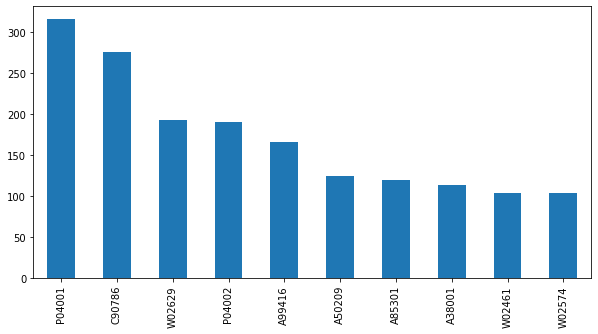

In [ ]:
# Find 10 job AgencyID has more number of employee
high_emp=df_cpy.AgencyID.value_counts()[:10]
plt.figure(figsize=(10,5))
high_emp.plot.bar()

Text(0, 0.5, '')

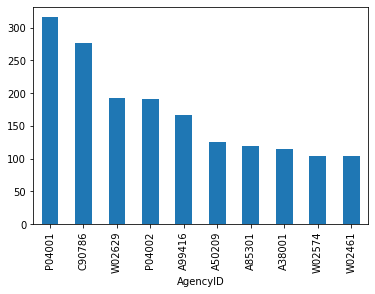

In [ ]:
df_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("")

Text(0.5, 1.0, 'Average salary of employees based on year')

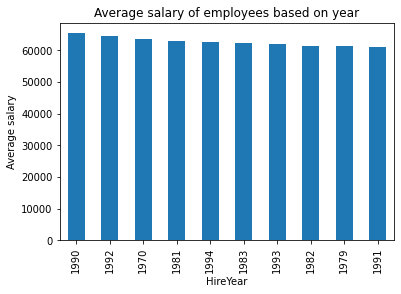

In [ ]:
# That in which year what was the max salary offered
df_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values(ascending=False)[:10].plot.bar()
plt.ylabel("Average salary")
plt.title("Average salary of employees based on year")

Text(0.5, 1.0, 'Average salary of employees based on year')

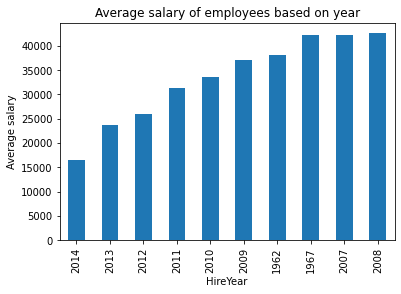

In [ ]:
# That in which year what was the least salary offered
df_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values()[:10].plot.bar()
plt.ylabel("Average salary")
plt.title("Average salary of employees based on year")

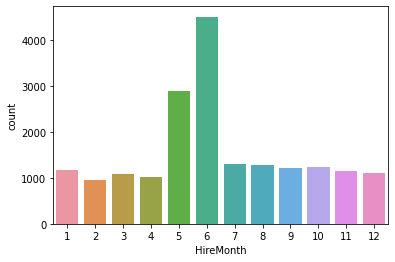

In [ ]:
# Check  if month has any particular effect on hiring
sb.countplot(df_cpy.HireMonth)

Text(0.5, 1.0, 'Average salary based on month')

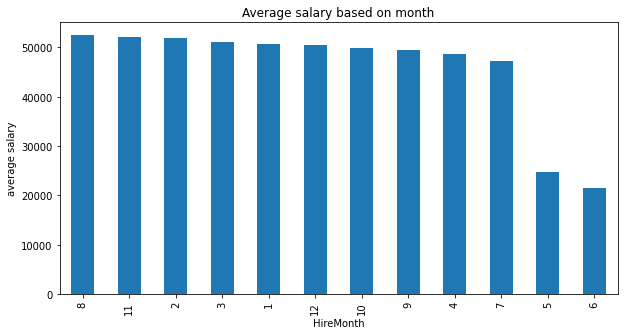

In [ ]:
# average salary in each month
plt.figure(figsize=(10,5)) 
df_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().sort_values(ascending=False).plot.bar()
plt.ylabel("average salary")
plt.title("Average salary based on month")

<Figure size 1080x1440 with 0 Axes>

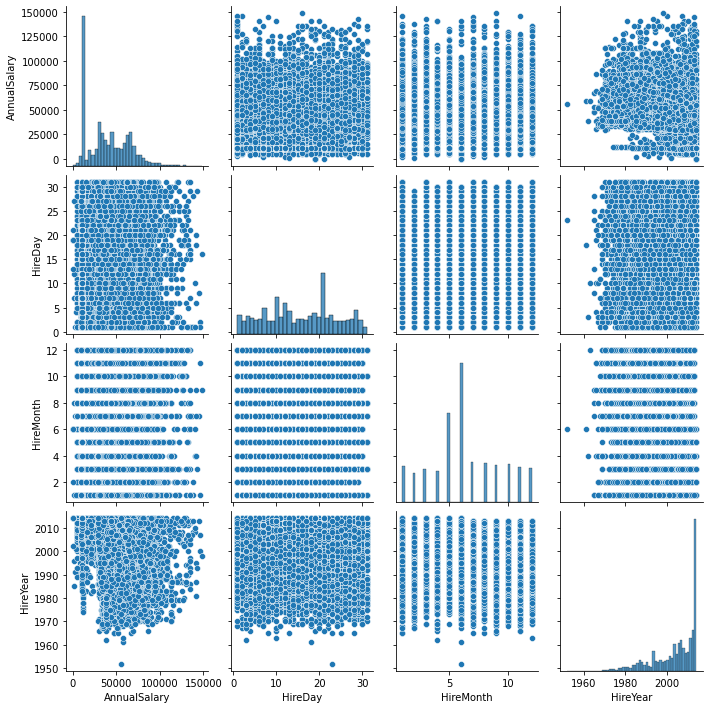

In [ ]:
## Multivariate analysis   we use pairplot for multivariate analysis
plt.figure(figsize=(15,20))
sb.pairplot(df_cpy)       # we use joinplot for bivariate analysis

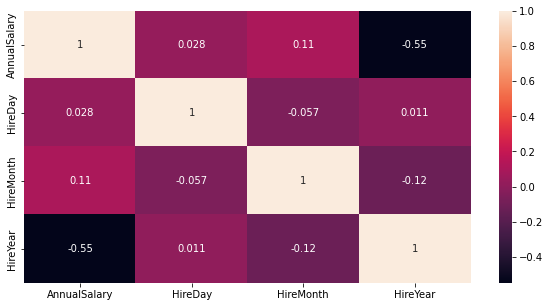

In [ ]:
# plot heatmap for corr()
plt.figure(figsize=(10,5))
sb.heatmap(df_cpy.corr(),annot=True)

# Feature Engineering

In [ ]:
df_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013


In [ ]:
## Apply mean encoding for JobTitle

mean_job= df_cpy.groupby(['JobTitle'])['AnnualSalary'].mean()

In [ ]:
mean_job

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1055, dtype: float64

In [ ]:
df_cpy['JobTitle']=df_cpy['JobTitle'].map(mean_job)
df_cpy.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
18976,"Zotamou,Jean Marie D",11313.967200,W02235,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",11313.967200,W02629,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",44531.160494,A99416,POLICE DEPARTMENT,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",60588.139335,A99262,POLICE DEPARTMENT,01/23/2013,44104.0,23,1,2013
18980,"Zukowski,Charles J",53368.428571,A50206,DPW-WATER & WASTE WATER,10/15/1979,53568.0,15,10,1979


In [ ]:
## Apply mean encoding for Agency

mean_agency= df_cpy.groupby(['Agency'])['AnnualSalary'].mean()
df_cpy['Agency']=df_cpy['Agency'].map(mean_agency)
df_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",11313.967200,W02200,11313.967200,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,A03031,51495.424242,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,A29005,64874.560224,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,A65026,39980.900360,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,A99416,61506.879579,07/24/2013,43999.0,24,7,2013


In [ ]:
## Apply mean encoding for AgencyID

mean_AgencyID= df_cpy.groupby(['AgencyID'])['AnnualSalary'].mean()
df_cpy['AgencyID']=df_cpy['AgencyID'].map(mean_AgencyID)

In [ ]:
df_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",11313.967200,11310.000000,11313.967200,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,46667.000000,51495.424242,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,65926.133333,64874.560224,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,48071.851064,39980.900360,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,44012.307229,61506.879579,07/24/2013,43999.0,24,7,2013


In [ ]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.9+ MB


In [ ]:
df_cpy=df_cpy.drop(['Name','HireDate'],axis=1)
df_cpy.head()

,JobTitle,AgencyID,Agency,AnnualSalary,HireDay,HireMonth,HireYear
0,11313.967200,11310.000000,11313.967200,11310.0,10,6,2013
1,47443.500000,46667.000000,51495.424242,53428.0,24,10,1979
2,69750.666667,65926.133333,64874.560224,68300.0,25,9,2006
3,57940.000000,48071.851064,39980.900360,62000.0,23,7,2009
4,44531.160494,44012.307229,61506.879579,43999.0,24,7,2013


# Model Building

In [ ]:
df_train,df_test= train_test_split(df_cpy,train_size=0.7,random_state=4)

In [ ]:
df_test.shape

(5669, 7)

In [ ]:
df_test.columns

Index(['JobTitle', 'AgencyID', 'Agency', 'AnnualSalary', 'HireDay',
       'HireMonth', 'HireYear'],
      dtype='object')

In [ ]:
y_train=df_train.pop('AnnualSalary')
x_train=df_train                      # Separeated x_train and  y_train for model building

# similarly for test sample

y_test=df_test.pop('AnnualSalary')
x_test=df_test

In [ ]:
y_test

9055     11310.0
3213     73600.0
18527    67749.0
11101    10038.0
11846    80900.0
          ...   
14178    65300.0
194       9891.0
6808     67300.0
14662    29245.0
4284     80000.0
Name: AnnualSalary, Length: 5669, dtype: float64

In [ ]:
x_test

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
9055,11313.967200,11310.000000,11313.967200,3,6,2010
3213,73600.000000,74617.000000,64009.314815,31,3,2014
18527,66904.663551,67990.039216,71013.212768,12,7,1999
11101,11522.106952,10272.043478,10234.535294,10,2,2005
11846,83257.142857,59810.709091,42565.513078,21,4,1986
...,...,...,...,...,...,...
14178,69750.666667,66079.388889,64874.560224,21,8,2004
194,11522.106952,9628.693878,10234.535294,12,5,2011
6808,65754.545455,56857.096774,47356.995336,24,2,2007
14662,29925.666667,34795.076923,42565.513078,3,11,2008


In [ ]:
# Initializing standard scaler 

standscale= StandardScaler()
x_train[x_train.columns]= standscale.fit_transform(x_train[x_train.columns])
x_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,1.074464e-18,2.863361e-16,9.770903e-17,-1.564184e-16,-1.289314e-16,-5.900735e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.544456e+00,-1.696002e+00,-1.402645e+00,-1.748141e+00,-1.823631e+00,-4.972314e+00
25%,-1.162730e+00,-1.276371e+00,-1.351145e+00,-7.989482e-01,-4.654450e-01,-5.748858e-01
50%,-1.501051e-01,8.869243e-02,1.398795e-01,3.159550e-02,-1.258986e-01,2.854805e-01
75%,8.567348e-01,8.975852e-01,1.043580e+00,7.434901e-01,5.531941e-01,8.590581e-01
max,4.147642e+00,3.131949e+00,2.235646e+00,1.811332e+00,1.911380e+00,9.546543e-01


In [ ]:
x_test[x_test.columns]=standscale.fit_transform(x_test[x_test.columns])
x_test

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
9055,-1.154599,-1.250178,-1.330085,-1.549218,-0.124148,0.564259
3213,1.421558,1.571258,1.170112,1.829833,-1.138749,0.955368
18527,1.144638,1.275911,1.502420,-0.463094,0.214052,-0.511291
11101,-1.145990,-1.296437,-1.381300,-0.704455,-1.476949,0.075372
11846,1.820979,0.911378,0.152684,0.623029,-0.800549,-1.782395
...,...,...,...,...,...,...
14178,1.262349,1.190758,1.211164,0.623029,0.552253,-0.022405
194,-1.145990,-1.325110,-1.381300,-0.463094,-0.462348,0.662036
6808,1.097069,0.779743,0.380022,0.985070,-1.476949,0.270927
14662,-0.384817,-0.203506,0.152684,-1.549218,1.566854,0.368704


# Linear Regression model building

In [ ]:
lr=LinearRegression()  #initializing 

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred= lr.predict(x_test)
y_pred=y_pred.reshape(-1,1)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

r2_score(y_test,y_pred)

0.9655385124043147

In [ ]:
mean_absolute_error(y_test,y_pred)

2569.6090339604875

In [ ]:
mean_squared_error(y_test,y_pred)

21080865.35099658

In [ ]:
lr.fit(x_train,y_train).intercept_

39697.79328595191